In [26]:
import random

random.seed(3001)
r = []
for j in range(0, 99):
    r.append([random.randint(-50, 50), random.randint(-50, 50), random.randint(-50, 50)])
print(r)

[[-13, 39, 6], [-32, -5, -19], [-14, -5, 36], [-8, 10, -14], [-1, 27, 31], [-3, -23, -39], [26, 33, -47], [50, 37, 15], [-47, 6, 6], [49, -28, -17], [2, 7, 4], [-49, -7, 12], [-25, -8, -17], [44, -5, 43], [-29, -3, 4], [27, -38, 39], [-40, 23, -13], [3, 43, -3], [48, -34, 46], [0, 28, -16], [29, 24, 48], [-32, 28, 26], [-11, -28, 39], [41, -3, -45], [27, 43, 20], [32, -30, -8], [-26, 41, -47], [-32, -5, 40], [29, -19, -23], [-42, -6, -17], [-21, -2, 48], [-20, -11, 0], [10, 10, -33], [20, -3, -11], [-22, 0, 49], [-7, -5, -10], [-21, -24, -16], [34, 12, 21], [-3, 26, 24], [-28, -1, 1], [5, -19, -3], [28, 50, -39], [23, 19, -25], [45, 39, -43], [6, 30, -6], [-28, -50, 38], [-6, -33, -9], [50, 32, -12], [13, 48, 47], [-47, 49, 36], [-29, -29, 20], [-38, -41, -44], [-22, 39, 39], [14, -47, -20], [26, -25, 30], [-36, -48, 1], [-33, -6, 17], [-29, -24, -18], [-17, 25, 14], [-26, 43, -37], [-28, 49, -42], [-18, -41, 21], [-43, 43, 42], [-8, 47, -20], [-33, 34, 8], [-35, 13, 3], [-14, 1, 25], 

In [27]:
def distance(point1, point2):
    square_differences = []
    for i in range(0, len(point1)):
        square_differences.append(abs(point2[i] - point1[i]) * abs(point2[i] - point1[i]))
    sum = 0
    for i in square_differences:
        sum = sum + i
    distance = sum ** 0.5
    return distance

In [28]:
class Node:
    def __init__(self, x):
        self.cluster = [x]
        self.height = 0
        self.rightChild = None
        self.leftChild = None

In [29]:
def singleLinkage(node1, node2):
    lowest = float('inf')
    node1cluster = node1.cluster
    node2cluster = node2.cluster
    for i in node1cluster:
        for j in node2cluster:
            value = distance(i, j)
            if value < lowest:
                lowest = value
    return lowest


def completeLinkage(node1, node2):
    max = 0
    node1cluster = node1.cluster
    node2cluster = node2.cluster
    for i in node1cluster:
        for j in node2cluster:
            value = distance(i, j)
            if value > max:
                max = value
    return max


def averageLinkage(node1, node2):
    sum = 0
    count = 0
    node1cluster = node1.cluster
    node2cluster = node2.cluster
    for i in node1cluster:
        for j in node2cluster:
            sum = sum + distance(i, j)
            count = count + 1
    return sum / count


def centroidLinkage(node1, node2):
    node1cluster = node1.cluster
    node2cluster = node2.cluster
    dimension1average = []
    for i in range(0, len(node1cluster[0])):
        dimensionsum = 0
        dimensioncount = 0
        for j in range(0, len(node1cluster)):
            dimensionsum = dimensionsum + node1cluster[j][i]
            dimensioncount = dimensioncount + 1
        dimension1average.append(dimensionsum / dimensioncount)
    dimension2average = []
    for i in range(0, len(node2cluster[0])):
        dimensionsum = 0
        dimensioncount = 0
        for j in range(0, len(node2cluster)):
            dimensionsum = dimensionsum + node2cluster[j][i]
            dimensioncount = dimensioncount + 1
        dimension2average.append(dimensionsum / dimensioncount)
    return distance(dimension1average, dimension2average)

In [30]:
def clustersToMerge(currentClusters, linkage): 
    minvalue = float('inf')
    node = (None, None, None)
    for i in range(0, len(currentClusters)):
        for j in range(i + 1, len(currentClusters)):
            linkval = linkage(currentClusters[i], currentClusters[j])
            if linkval < minvalue:
                minvalue = linkval
                node = (i, j, linkval)
    return node

In [31]:
def ahc(observations, linkage):
    clusters_new = []
    for i in observations:
        clusters_new.append(Node(i))
    while len(clusters_new) > 1:
        i, j, k = clustersToMerge(clusters_new, linkage)
        new_node = Node((clusters_new[i].cluster + clusters_new[j].cluster)[0])
        new_node.cluster = (clusters_new[i].cluster + clusters_new[j].cluster)
        new_node.height = k
        new_node.leftChild = clusters_new[i]
        new_node.rightChild = clusters_new[j]
        if i > j:
            del clusters_new[i]
            del clusters_new[j]
        else:
            del clusters_new[j]
            del clusters_new[i]
        clusters_new.append(new_node)
    return clusters_new[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


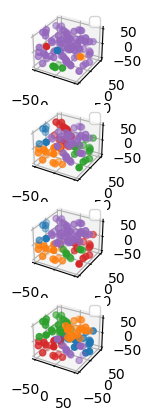

In [32]:
import matplotlib.pyplot as plt


def cutTree(root, k):
    clusters = [root]
    if k <= 0:
        result = []
        return result
    while (len(clusters) < k):
        max_val = 0
        for i in clusters:
            if i.height > max_val:
                max_val = i.height
                max_item = i
        clusters.remove(max_item)
        if max_item.leftChild and max_item.rightChild:
            clusters.append(max_item.leftChild)
            clusters.append(max_item.rightChild)
        else:
            clusters.append(max_item)
    outputs = []
    for i in clusters:
        outputs.append(i.cluster)
    return outputs


rands = []
for j in range(0, 99):
    rands.append([random.randint(-50, 50), random.randint(-50, 50), random.randint(-50, 50)])

trees = []
trees.append(ahc(rands, singleLinkage))
trees.append(ahc(rands, averageLinkage))
trees.append(ahc(rands, centroidLinkage))
trees.append(ahc(rands, completeLinkage))
tree = 1
graph = plt.figure()
for i in trees:
    clusters = cutTree(i, 5)
    j = graph.add_subplot(4, 1, tree, projection='3d')
    for i, cluster in enumerate(clusters):
        j.scatter(*(zip(*cluster)))
    j.legend()
    tree = tree + 1
plt.show()
